# Case Study 3 : Textual analysis of movie reviews

** Due Date: November 17, 2016 5:59PM**

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Shi He
    
    You Zhou
    
    Meng Wang
    
    Zili Ma
    
    Xiao-Qun Wang
    

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Enthought Canopy)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

- Write a text classification pipeline to classify movie reviews as either positive or negative.
- Find a good set of parameters using grid search.
- Evaluate the performance on a held out test set.


* Assuming that you have downloaded the scikit-learn source code:
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


path = os.getcwd()+'/txt_sentoken/'
# load data
# filenames: file that contain the data
# data: the text data in the file
# target_names: the label of the data
# target: the classification labels (integer index)
# DESCR: the full description of the dataset.
data = load_files(path, shuffle=False)

In [94]:
# split into train data and test data
# X stands for the data, Y stands for the index
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.25, random_state=None)

In [3]:
# feature_extraction.text.CountVectorizer([...])
# Convert a collection of text documents to a matrix of token counts

# feature_extraction.text.HashingVectorizer([...])
# Convert a collection of text documents to a matrix of token occurrences

# feature_extraction.text.TfidfTransformer([...])
# Transform a count matrix to a normalized tf or tf-idf representation
# feature_extraction.text.TfidfVectorizer([...]
pipeline = Pipeline([
                ('vect', CountVectorizer(min_df=3, max_df=0.95)),
                ('clf', LinearSVC(C=1000)),
                    ])

In [4]:
_ = pipeline.fit(X_train, y_train)
pipeline_result = pipeline.predict(X_test)
np.mean(pipeline_result == y_test)  

0.84599999999999997

In [5]:
parameters = {'vect__ngram_range': [(0,1),(1, 1), (1, 2),(1,3)],
              'clf__C': (800, 900, 1000) }
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
np.mean(grid_search.fit(X_train,y_train).predict(X_test)== y_test)

0.87

In [9]:
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

0 params - {'vect__ngram_range': (0, 1), 'clf__C': 800}; mean - 0.80; std - 0.01
1 params - {'vect__ngram_range': (1, 1), 'clf__C': 800}; mean - 0.80; std - 0.01
2 params - {'vect__ngram_range': (1, 2), 'clf__C': 800}; mean - 0.83; std - 0.01
3 params - {'vect__ngram_range': (1, 3), 'clf__C': 800}; mean - 0.83; std - 0.01
4 params - {'vect__ngram_range': (0, 1), 'clf__C': 900}; mean - 0.80; std - 0.01
5 params - {'vect__ngram_range': (1, 1), 'clf__C': 900}; mean - 0.80; std - 0.01
6 params - {'vect__ngram_range': (1, 2), 'clf__C': 900}; mean - 0.83; std - 0.01
7 params - {'vect__ngram_range': (1, 3), 'clf__C': 900}; mean - 0.83; std - 0.01
8 params - {'vect__ngram_range': (0, 1), 'clf__C': 1000}; mean - 0.80; std - 0.01
9 params - {'vect__ngram_range': (1, 1), 'clf__C': 1000}; mean - 0.80; std - 0.01
10 params - {'vect__ngram_range': (1, 2), 'clf__C': 1000}; mean - 0.83; std - 0.01
11 params - {'vect__ngram_range': (1, 3), 'clf__C': 1000}; mean - 0.83; std - 0.01


[0.79533333333333334, 0.79533333333333334, 0.82533333333333336, 0.82666666666666666, 0.79533333333333334, 0.79533333333333334, 0.82533333333333336, 0.82666666666666666, 0.79533333333333334, 0.79533333333333334, 0.82533333333333336, 0.82666666666666666]


/usr/local/var/pyenv/versions/3.5.2/envs/env/lib/python3.5/site-packages/sklearn/model_selection/_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


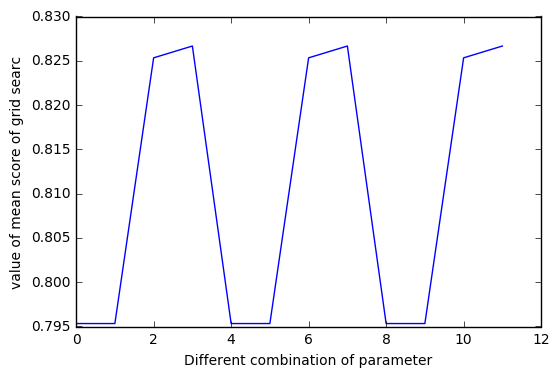

In [10]:
#get array of mean score
grid_mean_scores = [result.mean_validation_score for result in grid_search.grid_scores_]
print(grid_mean_scores)
plt.plot( grid_mean_scores)
plt.xlabel('Different combination of parameter')
plt.ylabel('value of mean score of grid searc')

In [8]:
# predict with the best parameter we found in the previous block
y_predicted = grid_search.predict(X_test)

# Print the classification report
print(metrics.classification_report(y_test, y_predicted,
                                        target_names=data.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

             precision    recall  f1-score   support

        neg       0.86      0.89      0.87       253
        pos       0.89      0.85      0.87       247

avg / total       0.87      0.87      0.87       500

[[226  27]
 [ 38 209]]


## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

# Definition
tf–idf is the product of two statistics, **term frequency** and **inverse document frequency**. Various ways for determining the exact values of both statistics exist.

In [14]:
pipeline = Pipeline([
                ('vect', TfidfVectorizer(min_df=3, max_df=0.95,binary = False, decode_error = 'ignore',  
                            stop_words = 'english')),
                ('clf', LinearSVC(C=1000)),
                    ])

In [15]:
_ = pipeline.fit(X_train, y_train)
pipeline_result = pipeline.predict(X_test)
np.mean(pipeline_result == y_test)    

0.85199999999999998

In [16]:
parameters = {'vect__ngram_range':[(0,1),(1, 1), (1, 2),(1,3)],}
grid_search1 = GridSearchCV(pipeline, parameters, n_jobs=-1)
np.mean(grid_search1.fit(X_train,y_train).predict(X_test)== y_test)

0.85199999999999998

In [17]:
n_candidates = len(grid_search1.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                % (grid_search1.cv_results_['params'][i],
                grid_search1.cv_results_['mean_test_score'][i],
                grid_search1.cv_results_['std_test_score'][i]))

0 params - {'vect__ngram_range': (0, 1)}; mean - 0.81; std - 0.01
1 params - {'vect__ngram_range': (1, 1)}; mean - 0.81; std - 0.01
2 params - {'vect__ngram_range': (1, 2)}; mean - 0.81; std - 0.02
3 params - {'vect__ngram_range': (1, 3)}; mean - 0.81; std - 0.01


**max_df** : float in range [0.0, 1.0] or int, default=1.0
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**min_df** : float in range [0.0, 1.0] or int, default=1
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**In other words**

### in float
 - the lower the max_df: we will lose more words 
 - the hgiher the min_df: we will lose more words
 
### in int
 - the lower the max_df: we will lose more words 
 - the hgiher the min_df: we will lose more words

In [18]:
import pandas as pd
max_df = np.linspace(0,1,num=11)
min_df = np.linspace(0,1,num=11)
df_df_float = pd.DataFrame(index=max_df, columns=min_df)
df_df_float = df_df_float.fillna(0.0) # with 0s rather than NaNs

In [19]:
# row max_df column min_df
for x in min_df:
    for y in max_df:
        pipeline = Pipeline([
                    ('vect', TfidfVectorizer(min_df=x, max_df=y, binary = False, decode_error = 'ignore',  
                            stop_words = 'english',)),
                    ('clf', LinearSVC(C=1000)),
                        ])
        try:
            _ = pipeline.fit(X_train, y_train)
            pipeline = pipeline.predict(X_test)
            out_come = np.mean(pipeline == y_test)
            df_df_float[x][y] = out_come
        except:
            pass
  

In [20]:
df_df_float

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
0.1,0.824,0.506,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
0.2,0.824,0.704,0.494,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
0.3,0.848,0.682,0.580,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
0.4,0.848,0.750,0.588,0.598,0.000,0.000,0.000,0.000,0.000,0.0,0.0
0.5,0.850,0.730,0.682,0.576,0.526,0.000,0.000,0.000,0.000,0.0,0.0
0.6,0.854,0.714,0.528,0.534,0.510,0.506,0.000,0.000,0.000,0.0,0.0
0.7,0.856,0.744,0.596,0.620,0.530,0.508,0.506,0.000,0.000,0.0,0.0
0.8,0.854,0.692,0.592,0.546,0.562,0.486,0.508,0.526,0.000,0.0,0.0
0.9,0.852,0.724,0.572,0.604,0.600,0.484,0.492,0.506,0.494,0.0,0.0


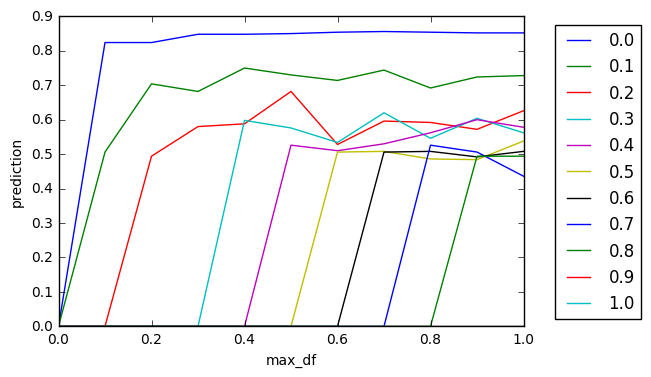

In [21]:
ax = df_df_float.plot()
ax.set_ylabel('prediction') ##should be 'prediction'
ax.set_xlabel('max_df')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
#ax.legend_.remove()

In [22]:
max_df = np.linspace(0,1,num=11)
min_df = np.arange(1,6)
df_df_int = pd.DataFrame(index=max_df, columns=min_df)
df_df_int = df_df_int.fillna(0.0) # with 0s rather than NaNs

In [23]:
# row max_df column min_df
for x in min_df:
    for y in max_df:
        pipeline = Pipeline([
                    ('vect', TfidfVectorizer(min_df=x, max_df=y, binary = False, decode_error = 'ignore',  
                            stop_words = 'english',)),
                    ('clf', LinearSVC(C=1000)),
                        ])
        try:
            _ = pipeline.fit(X_train, y_train)
            pipeline = pipeline.predict(X_test)
            out_come = np.mean(pipeline == y_test)
            df_df_int[x][y] = out_come
        except:
            pass

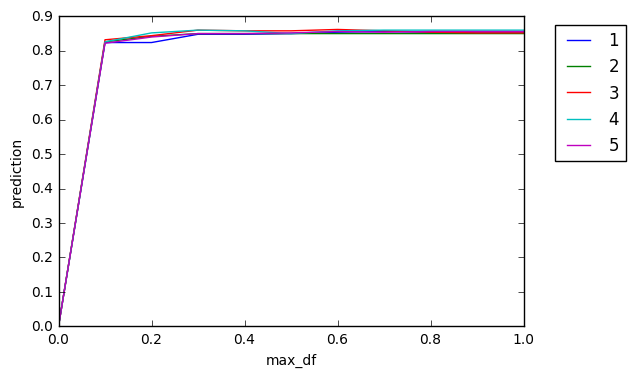

In [24]:
ax = df_df_int.plot()
ax.set_ylabel('prediction') ##should be 'prediction'
ax.set_xlabel('max_df')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [25]:
df_df_int

,1,2,3,4,5
0.0,0.000,0.000,0.000,0.000,0.000
0.1,0.824,0.826,0.832,0.826,0.822
0.2,0.824,0.842,0.844,0.852,0.840
0.3,0.848,0.850,0.860,0.860,0.850
0.4,0.848,0.850,0.858,0.858,0.850
0.5,0.850,0.850,0.858,0.850,0.852
0.6,0.854,0.850,0.862,0.858,0.856
0.7,0.856,0.850,0.858,0.860,0.854
0.8,0.854,0.850,0.854,0.860,0.856
0.9,0.852,0.850,0.852,0.860,0.856


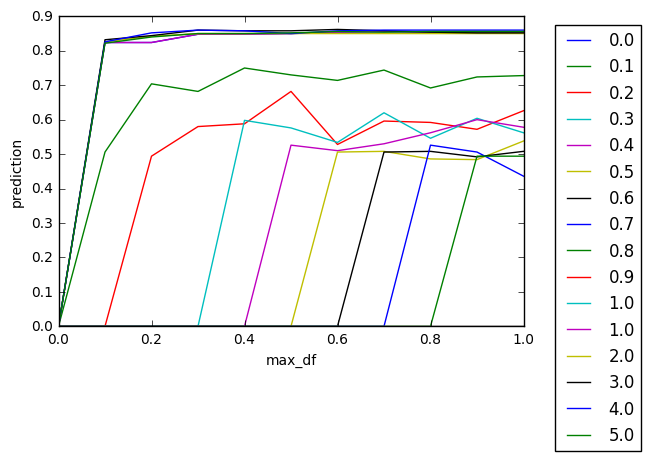

In [26]:
ax = pd.concat([df_df_float, df_df_int], axis=1, join='inner').plot()
ax.set_ylabel('prediction') ##should be 'prediction'
ax.set_xlabel('max_df')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [61]:
feature_num = {}
for n in range(1,10):
    ngram_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=n, max_df=0.95,
                                       binary = False, decode_error = 'ignore',
                                       stop_words = 'english')
    counts = ngram_vectorizer.fit_transform(X_train)
    feature_num[n] = len(ngram_vectorizer.get_feature_names())

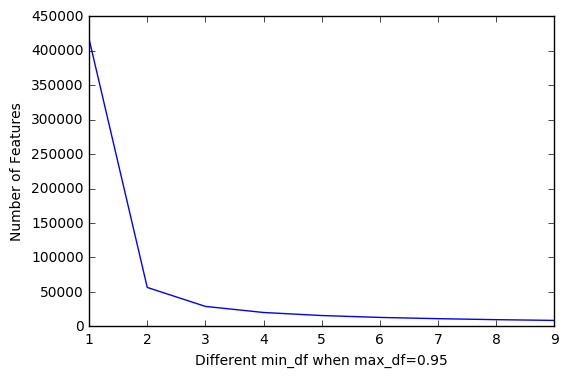

In [62]:
plt.plot(list(feature_num.keys()),list(feature_num.values()))
plt.xlabel('Different min_df when max_df=0.95')
plt.ylabel('Number of Features')

In [65]:
feature_num = {}
for n in range(1,50):
    ngram_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=1, max_df=n,
                                       binary = False, decode_error = 'ignore',
                                       stop_words = 'english')
    counts = ngram_vectorizer.fit_transform(X_train)
    feature_num[n] = len(ngram_vectorizer.get_feature_names())

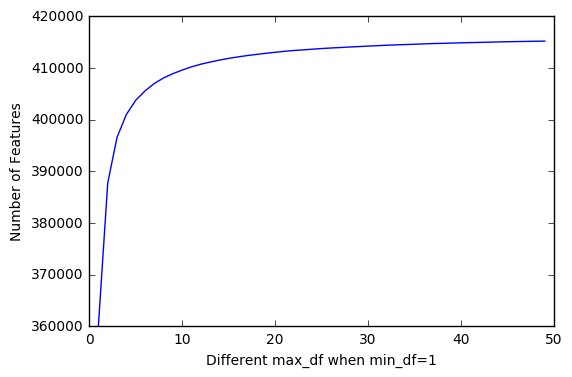

In [66]:
plt.plot(list(feature_num.keys()),list(feature_num.values()))
plt.xlabel('Different max_df when min_df=1')
plt.ylabel('Number of Features')

**ngram_range** : tuple (min_n, max_n)
The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

# In other words, the total combination of the words

In [54]:
feature_num = {}
for n in range(2,10):
    ngram_vectorizer = TfidfVectorizer(ngram_range=(1, n), min_df=1, max_df=0.95,
                                       binary = False, decode_error = 'ignore',
                                       stop_words = 'english')
    counts = ngram_vectorizer.fit_transform(X_train)
    feature_num[n] = len(ngram_vectorizer.get_feature_names())

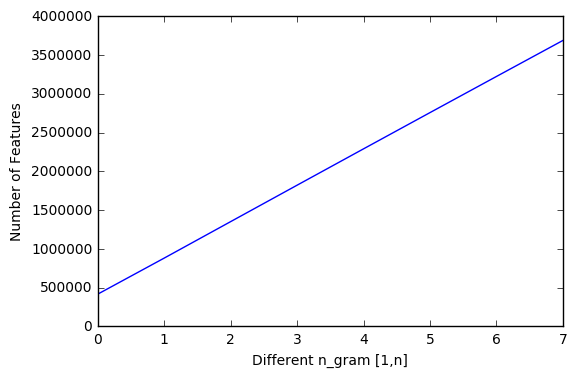

In [56]:
plt.plot(list(feature_num.keys()),list(feature_num.values()))
plt.xlabel('Different n_gram [1,n]')
plt.ylabel('Number of Features')

In [59]:
feature_num = {}
for n in range(1,5):
    ngram_vectorizer = TfidfVectorizer(ngram_range=(n, 5), min_df=1, max_df=0.95,
                                       binary = False, decode_error = 'ignore',
                                       stop_words = 'english')
    counts = ngram_vectorizer.fit_transform(X_train)
    feature_num[n] = len(ngram_vectorizer.get_feature_names())

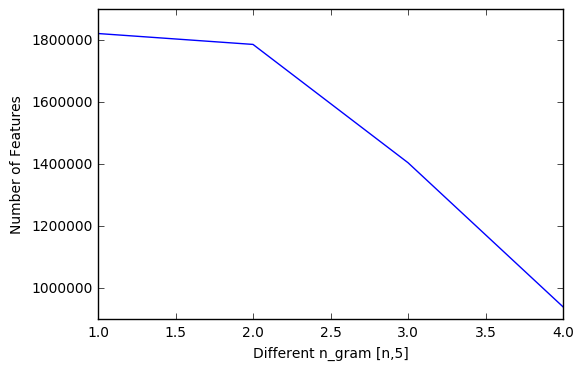

In [60]:
plt.plot(list(feature_num.keys()),list(feature_num.values()))
plt.xlabel('Different n_gram [n,5]')
plt.ylabel('Number of Features')

In [27]:
df_ngram = pd.DataFrame(index=[0,1,2,3,4,5], columns=[0,1,2,3,4,5])
df_ngram = df_ngram.fillna(0.0)

In [28]:
# row max_df column min_df
for x in [0,1,2,3,4,5]:
    for y in [0,1,2,3,4,5]:
        pipeline = Pipeline([
                    ('vect', TfidfVectorizer(min_df=5, max_df=0.95,ngram_range=(y,x),binary = False, decode_error = 'ignore',  
                            stop_words = 'english')),
                    ('clf', LinearSVC(C=1000)),
                        ])
        try:
            _ = pipeline.fit(X_train, y_train)
            pipeline = pipeline.predict(X_test)
            out_come = np.mean(pipeline == y_test)
            df_ngram[x][y] = out_come
        except:
            pass

In [29]:
df_ngram

,0,1,2,3,4,5
0,0.0,0.856,0.856,0.858,0.858,0.856
1,0.0,0.856,0.856,0.858,0.858,0.856
2,0.0,0.856,0.704,0.714,0.712,0.712
3,0.0,0.856,0.000,0.542,0.536,0.552
4,0.0,0.856,0.000,0.000,0.496,0.496
5,0.0,0.856,0.000,0.000,0.000,0.504


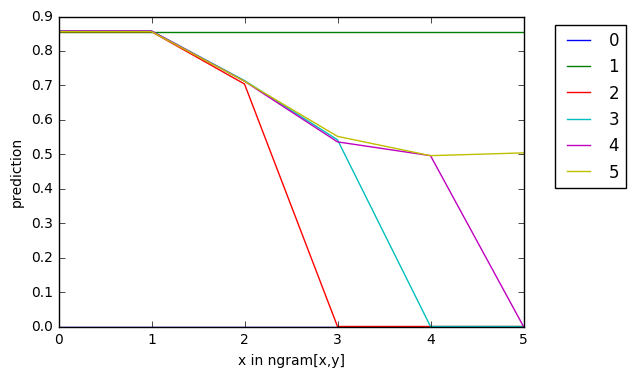

In [97]:
ax = df_ngram.plot()
ax.set_ylabel('prediction') ##should be 'prediction'
ax.set_xlabel('x in ngram[x,y]')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [67]:
#Based upon Problem 2 pick some parameters for TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
                    min_df=3, max_df=0.95,ngram_range=(1,2),
                    binary=False, decode_error='ignore',
                    stop_words='english')

x_train = tfidf_vectorizer.fit_transform(X_train)

x_test = tfidf_vectorizer.transform(X_test)

x = tfidf_vectorizer.transform(data.data)

data = pd.DataFrame(data=x_train.toarray(), columns=tfidf_vectorizer.get_feature_names())

print(data.shape)
print(data.head())

(1500, 28974)
    00  000  000 000  000 dollars  000 feet  000 leagues  000 years  007   10  \
0  0.0  0.0      0.0          0.0       0.0          0.0        0.0  0.0  0.0   
1  0.0  0.0      0.0          0.0       0.0          0.0        0.0  0.0  0.0   
2  0.0  0.0      0.0          0.0       0.0          0.0        0.0  0.0  0.0   
3  0.0  0.0      0.0          0.0       0.0          0.0        0.0  0.0  0.0   
4  0.0  0.0      0.0          0.0       0.0          0.0        0.0  0.0  0.0   

   10 000  ...    zombies  zone  zones  zoo  zoom  zooming  zooms  zucker  \
0     0.0  ...        0.0   0.0    0.0  0.0   0.0      0.0    0.0     0.0   
1     0.0  ...        0.0   0.0    0.0  0.0   0.0      0.0    0.0     0.0   
2     0.0  ...        0.0   0.0    0.0  0.0   0.0      0.0    0.0     0.0   
3     0.0  ...        0.0   0.0    0.0  0.0   0.0      0.0    0.0     0.0   
4     0.0  ...        0.0   0.0    0.0  0.0   0.0      0.0    0.0     0.0   

   zucker brothers  zwick  
0       

In [68]:
#Try a number of different parameter settings for each and judge your performance using a confusion matrix

#LinearSVC(C=1000),min_df=3, max_df=0.95,ngram_range=(1,2)
pipeline = Pipeline([
                ('vect', TfidfVectorizer(min_df=2, max_df=0.95,ngram_range=(1,2),binary=False, decode_error='ignore',stop_words='english')),
                ('clf', LinearSVC(C=1000)),
                    ])
_ = pipeline.fit(X_train, y_train)
pipeline_result = pipeline.predict(X_test)
print(np.mean(pipeline_result == y_test))
cm = metrics.confusion_matrix(y_test, pipeline_result)
print(cm)

0.856
[[214  39]
 [ 33 214]]


In [70]:
#Try a number of different parameter settings for each and judge your performance using a confusion matrix

#KNN(N=5),min_df=3, max_df=0.95,ngram_range=(1,2)
from sklearn.neighbors import KNeighborsClassifier
pipeline = Pipeline([
                ('vect', TfidfVectorizer(min_df=3, max_df=0.95,ngram_range=(1,2),binary=False, decode_error='ignore',stop_words='english')),
                ('clf', KNeighborsClassifier(n_neighbors=5)),
                    ])
_ = pipeline.fit(X_train, y_train)
pipeline_result = pipeline.predict(X_test)
print(np.mean(pipeline_result == y_test))
cm = metrics.confusion_matrix(y_test, pipeline_result)
print(cm)

0.692
[[169  84]
 [ 70 177]]


In [71]:
##Try a number of different parameter settings for knn and judge the performance using a confusion matrix, to disover best k.
k_range = np.concatenate((np.arange(0,10,1),np.arange(10,200,10),np.arange(200,1100,100)))
df_k = pd.DataFrame(index=['k_n'], columns=k_range)
df_k = df_k.fillna(0.0)

In [72]:
for n in df_k:
    pipeline = Pipeline([
                ('vect', TfidfVectorizer(min_df=5, max_df=0.95,ngram_range=(1,2),binary=False, decode_error='ignore',stop_words='english')),
                ('clf', KNeighborsClassifier(n_neighbors=n)),
                        ])
    try:
        _ = pipeline.fit(X_train, y_train)
        pipeline = pipeline.predict(X_test)
        out_come = np.mean(pipeline == y_test)
        df_k[n][0] = out_come
    except:
        pass

In [73]:
df_k = df_k.transpose()

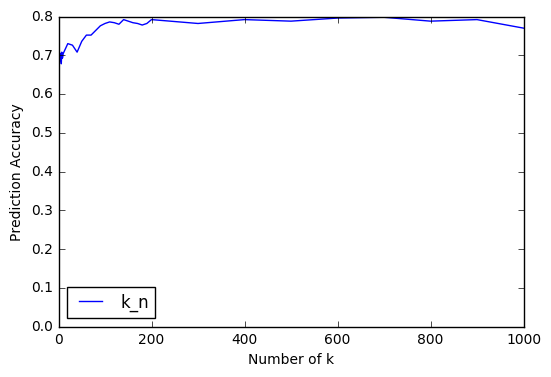

In [74]:
ax = df_k.plot()
ax.set_ylabel('Prediction Accuracy')
ax.set_xlabel('Number of k')

In [75]:
# We choose the optimized k-number and judge the knn's performance using a confusion matrix cm.
optimal_k = df_k.idxmax()["k_n"]
df_k.idxmax()["k_n"]

700

In [76]:
# We choose the optimized k-number and judge the knn's performance using a confusion matrix cm.
optimal_k = df_k.idxmax()["k_n"]
pipeline = Pipeline([
                ('vect', TfidfVectorizer(min_df=3, max_df=0.95,ngram_range=(1,2))),
                ('clf', KNeighborsClassifier(n_neighbors=optimal_k)),
                    ])
_ = pipeline.fit(X_train, y_train)
pipeline_result = pipeline.predict(X_test)
print(np.mean(pipeline_result == y_test))
cm = metrics.confusion_matrix(y_test, pipeline_result)
print(cm)

0.806
[[229  24]
 [ 73 174]]


In [77]:
##Try a number of different parameter settings for LinearSVC and judge the performance using a confusion matrix, to discover the best C.
cs = np.logspace(-2, 3, 10)
pipeline = Pipeline([
                ('vect', TfidfVectorizer(min_df=3, max_df=0.95,
                                         ngram_range=(1,2), binary=False, 
                                         decode_error='ignore',stop_words='english')),
                ('clf', LinearSVC(C=1000)),
                    ])
parameters = {'clf__C': cs,}
#_ = pipeline.fit(X_train, y_train)
#pipeline = pipeline.predict(X_test)
grid_search = GridSearchCV(pipeline, param_grid=parameters, n_jobs=-1)
np.mean(grid_search.fit(X_train,y_train).predict(X_test)== y_test)

0.85999999999999999

In [78]:
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

0 params - {'clf__C': 0.01}; mean - 0.78; std - 0.01
1 params - {'clf__C': 0.035938136638046278}; mean - 0.79; std - 0.02
2 params - {'clf__C': 0.12915496650148839}; mean - 0.80; std - 0.01
3 params - {'clf__C': 0.46415888336127797}; mean - 0.81; std - 0.01
4 params - {'clf__C': 1.6681005372000592}; mean - 0.82; std - 0.01
5 params - {'clf__C': 5.9948425031894086}; mean - 0.81; std - 0.01
6 params - {'clf__C': 21.544346900318846}; mean - 0.81; std - 0.02
7 params - {'clf__C': 77.426368268112782}; mean - 0.81; std - 0.02
8 params - {'clf__C': 278.2559402207126}; mean - 0.81; std - 0.02
9 params - {'clf__C': 1000.0}; mean - 0.81; std - 0.02


In [79]:
y_predicted = grid_search.predict(X_test)
print(np.mean(y_predicted == y_test))
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

0.86
[[216  37]
 [ 33 214]]
Best parameters set:
	clf__C: 1.6681005372000592


* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
    <br>Yes, we found that LinearSVC did things better than KNN, perhaps the scale of dataset is little small and KNN is better for larger datasets.

In [80]:
#Classifier: KNeighborsClassifier
#Parameters: k = 185

diff_idx = np.where((pipeline_result != y_test) & (pipeline_result==1))
ex1 = X_test[diff_idx[0][0]]
ex2 = X_test[diff_idx[0][1]]
print ("Example1:\n",ex1)
print ("\nExample2:\n",ex2)

Example1:
 b' " with all that education , you should know what happiness is . " \nstarring sylvia chang , teresa hu , hsu ming , li lieh , mao hsueh-wei ; directed by edward yang ; written by yang and wu nien-chen ; cinematography by christopher doyle and chang hui-kung \nevery country has , eventually , its new wave . \nfrance had its nouvelle vague , brazil its cinema novo , china its fifth generation , and on and on . \nsome waves just take longer than others , before they wash over us , cleansing us with the balm of discovery . \ntaiwan\'s new wave came in the 1980s , in the work of directors like hou hsiao-hsien , wan jen , and edward yang ; that day , on the beach--yang\'s first feature--is central . \nit created a new language for young taiwanese directors , even if the first attempts to speak that language were hesitant and faltering . \nlater works refined the techniques that yang first explored here , giving taiwan a distinctive international presence . \nthat day itself is l

* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?<br>
On the condition, we picked two examples with wrong answers and the right answer is negative.As we can see, there are lots of "postive" words in the texts, so we believe that machine can make wrong decisions.  

*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

# First method: The length of the review versus the number of features we compute that are in that review

In [81]:
#Try the first method of professor
tfidf_vectorizer = TfidfVectorizer(min_df=3, max_df=0.95,ngram_range=(1,2),
                                   binary=False, decode_error='ignore',stop_words='english')
tfidf_Xtrain = tfidf_vectorizer.fit_transform(X_train)

In [82]:
##The length of the review versus the number of features we compute that are in that review
len_, feature = [],[]
Cluster = y_train
for i in range(len(X_train)):
    len_.append(len(X_train[i]))
    feature.append(tfidf_Xtrain[i].getnnz())
#df_k = pd.DataFrame(index=['k_n'], columns=np.arange(0,200,10))

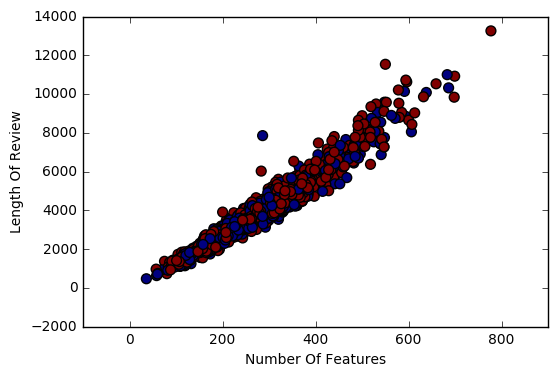

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(feature,len_,c=Cluster,s=50)
ax.set_xlabel('Number Of Features')
ax.set_ylabel('Length Of Review')
#fig.show()

# Second method: Principle Component Analysis on a subset of the features.

0.652


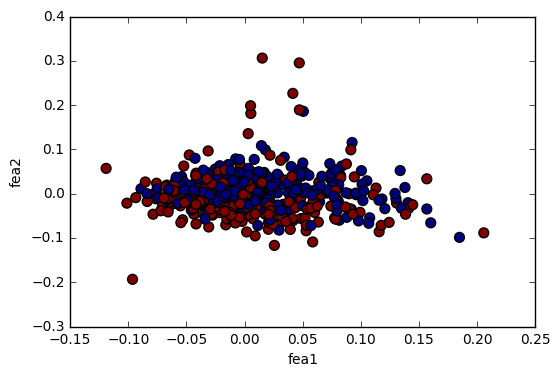

In [84]:
#Try the second method of professor(PCA)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
count_vec = TfidfVectorizer(binary=False, decode_error='ignore',
                                stop_words='english',min_df=3, max_df=0.95,ngram_range=(1,2))

x_train = count_vec.fit_transform(X_train)
x_test = count_vec.transform(X_test)


pca = PCA(n_components=2)
fea_train = pca.fit_transform(x_train.toarray())
fea_test=pca.transform(x_test.toarray())

svclf = LinearSVC(C=21.544346900318846)
svclf.fit(fea_train, y_train)
pred = svclf.predict(fea_test)
print(np.mean(pred == y_test))
df = pd.DataFrame(data=fea_test, columns=['1','2'])
fea1=list(df['1'].values)
fea2=list(df['2'].values)

Cluster = y_test
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(fea1, fea2, c=Cluster, s=50)
ax.set_xlabel('fea1')
ax.set_ylabel('fea2')

# Try our own method 1 ---Using feature selection

In [85]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

tfidf_vectorizer = TfidfVectorizer(min_df=3, max_df=0.95,ngram_range=(1,2),
                                   binary=False, decode_error='ignore',stop_words='english')
data = load_files(path, shuffle=False)
X_all, X_test, y_all, y_test = train_test_split(data.data, data.target, test_size=0, random_state=None)
tfidf_Xall = tfidf_vectorizer.fit_transform(X_all)
tfidf_Xall = tfidf_Xall.toarray()

feature_new = SelectKBest(chi2, k=2).fit_transform(tfidf_Xall, y_all)


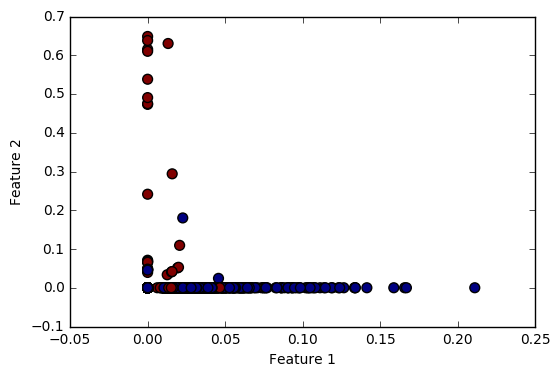

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
f_new = feature_new
scatter = ax.scatter(f_new[:,0],f_new[:,1],c=y_all,s=50)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# Try our own method 2 ---The first feature is number of "negative" words,the second feature is number of "positive" words

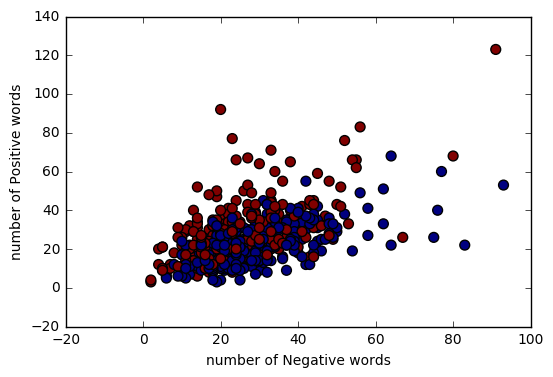

In [95]:
#Try our own method---The first feature is number of "negative" words,the second feature is number of "positive" words)
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
%matplotlib inline
stop = set(stopwords.words('english'))
def load_words(inFile):
    Result = []
    fo = open(inFile, 'r', errors='ignore', encoding='utf-8')
    content = fo.readlines()
    for item in content:
        if item[0] != ';':
            Result.append(item.strip('\n'))
    fo.close()
    return Result
neg_words_initial = load_words('negative-words.txt')
pos_words_initial = load_words('positive-words.txt')
listi=[]
listj=[]
for review in X_test:
    i=j=0
    sens=nltk.sent_tokenize(bytes.decode(review))
    words=[]
    for sent in sens:
        words.append(nltk.word_tokenize(sent))
    wordslist=[]
    for word in words:
        wordslist+=word
    rewords = [word for word in wordslist if word.lower() not in stop]
    for temp in rewords:
        if temp in pos_words_initial:
            i+=1
        elif temp in neg_words_initial:
            j+=1
    #print(i,j)
    listi.append(i)
    listj.append(j)
Cluster = y_test
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(listj, listi, c=Cluster, s=50)
ax.set_xlabel('number of Negative words')
ax.set_ylabel('number of Positive words')

# Try our own method 3 ---The distance from the "negative" central versus the distance from the "positive" central.
---
First we split our data into train and test

In [172]:
import pandas
import numpy as np
#using the training data set, will get higher error, but this is testing error
tfidf_vectorizer = TfidfVectorizer(min_df=3, max_df=0.95,ngram_range=(1,2),binary=False, decode_error='ignore',stop_words='english')
#tfidf_Xtrain = tfidf_vectorizer.fit_transform(X_train)
Index = np.arange(0,2000)
Index_train, Index_test, y_train, y_test = train_test_split(Index, data.target, test_size=0.25, random_state=None)

X_all, X_none, y_all, y_none = train_test_split(data.data, data.target, test_size=0, random_state=None)
tfidf_Xall = tfidf_vectorizer.fit_transform(X_all)
tfidf_Xall = tfidf_Xall.toarray()

#####Using Training set###
central_neg = tfidf_Xall[Index_train][y_train == 0].mean(axis = 0)
central_pos = tfidf_Xall[Index_train][y_train == 1].mean(axis = 0)


size = 500
Dist_to_neg = [0.0] * size
Dist_to_pos = [0.0] * size

for i in range(0,size):
    Dist_to_neg[i] = np.dot((tfidf_Xall[Index_test][i] - central_neg), np.transpose((tfidf_Xall[Index_test][i] - central_neg)))
    Dist_to_pos[i] = np.dot((tfidf_Xall[Index_test][i] - central_pos), np.transpose((tfidf_Xall[Index_test][i] - central_pos)))

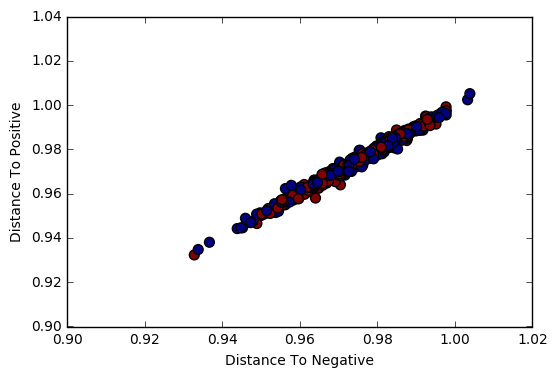

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(Dist_to_neg,Dist_to_pos,c=y_test,s=50)
ax.set_xlabel('Distance To Negative')
ax.set_ylabel('Distance To Positive')

In [99]:
data = load_files(path, shuffle=False)

In [100]:
MyTF_IDF = TfidfVectorizer(ngram_range=(1, 2), max_df=0.95, min_df=3, max_features=None, binary=True,
                             norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)

x_all = MyTF_IDF.fit_transform(data.data) 

In [101]:
x_centroid_neg = x_all[data.target == 0].mean(axis = 0)
x_centroid_pos = x_all[data.target == 1].mean(axis = 0)

Dist_to_neg = [0.0] * 2000
Dist_to_pos = [0.0] * 2000

for i in range(0,2000):
    Dist_to_neg[i] = np.dot((x_all[i] - x_centroid_neg), np.transpose((x_all[i] - x_centroid_neg))).item(0,0)
    Dist_to_pos[i] = np.dot((x_all[i] - x_centroid_pos), np.transpose((x_all[i] - x_centroid_pos))).item(0,0) 

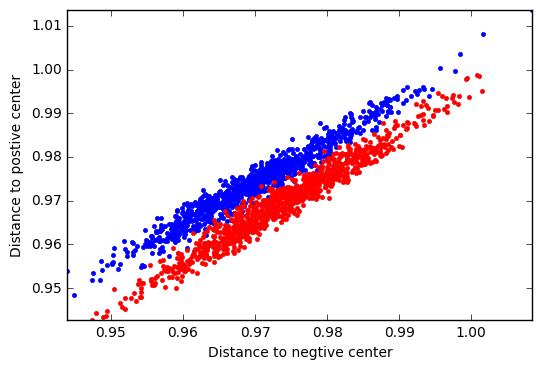

In [102]:
X_all_filtered = pandas.DataFrame(np.zeros((2000,2)), columns=[ 'Dist_to_neg', 'Dist_to_pos'])
X_all_filtered['Dist_to_pos'] = Dist_to_pos
X_all_filtered['Dist_to_neg'] = Dist_to_neg
X_all_filtered = X_all_filtered.as_matrix()
plt.plot(X_all_filtered[0:1000, 0], X_all_filtered[0:1000, 1],"b.")
plt.plot(X_all_filtered[1000:2000, 0], X_all_filtered[1000:2000, 1], "r.")

plt.axis([min(X_all_filtered[:, 0]), max(X_all_filtered[:, 0]), min(X_all_filtered[:, 1]), max(X_all_filtered[:, 1])])
plt.xlabel('Distance to negtive center')
plt.ylabel('Distance to postive center')

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

   (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu and wliu3@wpi.edu with the subject: "[DS501] Case study 3-TEAM NUMBER ???".